In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, Input, Conv2DTranspose, MaxPool2D, Activation, BatchNormalization, Concatenate
from keras.utils.vis_utils import plot_model

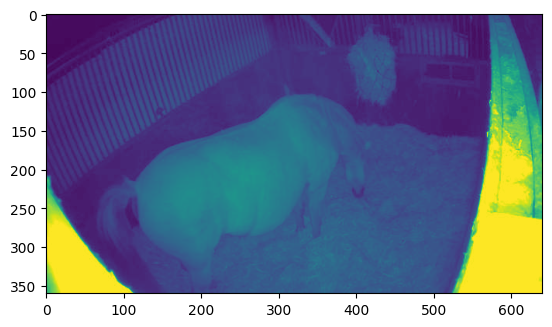

In [2]:
img = cv2.imread(r"C:\Users\RemigiuszPomorski\Desktop\Projekty\Equinity\data\ogon_w_gorze\ogon_w_gorze (1).jpeg", 0)
plt.imshow(img)

In [3]:
def conv_layer(input, n_filters):
    x = Conv2D(n_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x  

def conv_block(input, n_filters):
    x = conv_layer(input, n_filters)
    x = conv_layer(x, n_filters)
    p = MaxPool2D((2,2))(x)
    return x, p

def up_sumple_conv_block(input, skip_features, n_filters):
    x = Conv2DTranspose(n_filters, (2,2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_layer(x, n_filters)
    x = conv_layer(x, n_filters)
    return x

def create_UNet(img_shape):
    input = Input(img_shape)
    s1, x = conv_block(input, 64)
    s2, x = conv_block(x, 128)
    s3, x = conv_block(x, 256)
    s4, x = conv_block(x, 512)
    
    #most
    x = conv_layer(x, 1024)
    x = conv_layer(x, 1024)
    
    x = up_sumple_conv_block(x, s4, 512)
    x = up_sumple_conv_block(x, s3, 256)
    x = up_sumple_conv_block(x, s2, 128)
    x = up_sumple_conv_block(x, s1, 64)
    outputs = Conv2D(3, 1, padding = "same", activation = "softmax")(x)
    model = tf.keras.Model(inputs=input, outputs = outputs)
    return model

model = create_UNet((256,256,1))

In [5]:
plot_model(model, to_file='model_plot.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
